In [1]:
%load_ext cython

In [20]:
import gwsurrogate
import numpy as np

from math import cos
from math import sin
from math import sqrt
from math import factorial
from math import pi
from math import e
from numpy import conj

import bilby
import WaVel

import matplotlib.pyplot as plt
%matplotlib inline

# Define constants: speed of light (in m/s), gravitational constant (in m^3/(kg*s^2)), solar mass (in kg) and megaparsec (in m)
c = 2.99e8
G = 6.67e-11
M_sun = 1.99e30
Mpc = 3.09e22

/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


In [21]:
# Define labels, sampling frequency and times
outdir = 'outdir'
label = 'moving_bbh'
sampling_frequency = 1024
duration = 2.0
geocent_time = 0.0
start_time = geocent_time - duration + 0.02

In [22]:
# Load the surrogate model
surrogate = gwsurrogate.LoadSurrogate('NRHybSur3dq8')

# Define the time-domain model
def moving_bbh(times, mass, ratio, distance, theta, phi, speed, v_the, v_phi,**kwargs):

    arg_ = {'surrogate_':surrogate,'M_':mass, 'q_':ratio, 'dis_':distance, 'the_':theta, 'phi_':phi, 'v_mag_':speed, 'v_the_':v_the, 'v_phi_':v_phi, 'times_':times, **kwargs}
    fplus = WaVel.Fn(**arg_)
    h_plus = fplus.WaVe()[0]
    h_cross = fplus.WaVe()[1]

    return {'plus': h_plus, 'cross': h_cross}

Loaded NRHybSur3dq8 model


In [4]:
moving_bbh(np.array([-1000,-500]),650,6,300,45,45,3000,0,0) 

{'plus': array([-9.70664572e-22,  1.07894238e-21]),
 'cross': array([1.74790847e-22, 1.50404401e-22])}

In [7]:
np.linspace(-1000.0,-100.0,10)

array([-1000.,  -900.,  -800.,  -700.,  -600.,  -500.,  -400.,
        -300.,  -200.,  -100.])

In [5]:
#for 10 time points
import time 

ttt = np.linspace(-1000.0,-100.0,10)
t0 = time.time()
zz = moving_bbh(ttt,650,6,300,45,45,3000,0,0) 

t1 = time.time()
print('Execution took {:.4f}'.format(t1 - t0))

Execution took 0.4191


In [5]:
#for 10 time points
import time 

ttt = np.linspace(-1000.0,-100.0,10)
t0 = time.time()
zz = moving_bbh(ttt,650,6,300,45,45,3000,0,0) 

t1 = time.time()
print('Execution took {:.4f}'.format(t1 - t0))

Execution took 26.1352


In [8]:
#for 10 time points
import time 

ttt = np.linspace(-1000.0,-100.0,10)
t0 = time.time()
zz = moving_bbh(ttt,650,6,300,45,45,3000,0,0) 

t1 = time.time()
print('Execution took {:.4f}'.format(t1 - t0))

Execution took 7.7819


In [23]:
# Define parameters to inject
injection_parameters = dict(mass=50, ratio=6, distance=300, theta=45, phi=45, speed=3000, v_the=0, v_phi=0, ra=0, dec=0, psi=0, geocent_time=geocent_time)
# Generate model with waveform_generator
waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(sampling_frequency=sampling_frequency, duration=duration, time_domain_source_model=moving_bbh, start_time=start_time)
# Inject signal into ifos
ifos = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])
ifos.set_strain_data_from_power_spectral_densities(sampling_frequency=sampling_frequency, duration=duration, start_time=start_time)
ifos.inject_signal(waveform_generator=waveform_generator, parameters=injection_parameters)

17:03 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: None
  time_domain_source_model: __main__.moving_bbh
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
17:03 bilby INFO    : Injected signal in H1:
17:03 bilby INFO    :   optimal SNR = 31.20
17:03 bilby INFO    :   matched filter SNR = 30.59-1.66j
17:03 bilby INFO    :   mass = 50
17:03 bilby INFO    :   ratio = 6
17:03 bilby INFO    :   distance = 300
17:03 bilby INFO    :   theta = 45
17:03 bilby INFO    :   phi = 45
17:03 bilby INFO    :   speed = 3000
17:03 bilby INFO    :   v_the = 0
17:03 bilby INFO    :   v_phi = 0
17:03 bilby INFO    :   ra = 0
17:03 bilby INFO    :   dec = 0
17:03 bilby

[{'plus': array([3.60720311e-25+0.00000000e+00j,
         3.46942808e-25+3.84932968e-26j,
         3.45881746e-25+5.41421062e-26j, ...,
         5.04840882e-25-5.39860750e-26j,
         5.07309793e-25-2.70419804e-26j,
         5.08133623e-25+0.00000000e+00j]),
  'cross': array([-1.23139818e-24+0.00000000e+00j,
         -1.25484240e-24+2.16567657e-26j,
         -1.25500337e-24+1.03903532e-26j, ...,
          4.75784513e-26-3.30317686e-28j,
          4.74185350e-26-1.58336381e-28j,
          4.73650453e-26+0.00000000e+00j])},
 {'plus': array([3.60720311e-25+0.00000000e+00j,
         3.46942808e-25+3.84932968e-26j,
         3.45881746e-25+5.41421062e-26j, ...,
         5.04840882e-25-5.39860750e-26j,
         5.07309793e-25-2.70419804e-26j,
         5.08133623e-25+0.00000000e+00j]),
  'cross': array([-1.23139818e-24+0.00000000e+00j,
         -1.25484240e-24+2.16567657e-26j,
         -1.25500337e-24+1.03903532e-26j, ...,
          4.75784513e-26-3.30317686e-28j,
          4.74185350e-26-1.

17:03 bilby INFO    : Injected signal in H1:
17:03 bilby INFO    :   optimal SNR = 31.20
17:03 bilby INFO    :   matched filter SNR = 93.00-1.66j
17:03 bilby INFO    :   mass = 50
17:03 bilby INFO    :   ratio = 6
17:03 bilby INFO    :   distance = 300
17:03 bilby INFO    :   theta = 45
17:03 bilby INFO    :   phi = 45
17:03 bilby INFO    :   speed = 3000
17:03 bilby INFO    :   v_the = 0
17:03 bilby INFO    :   v_phi = 0
17:03 bilby INFO    :   ra = 0
17:03 bilby INFO    :   dec = 0
17:03 bilby INFO    :   psi = 0
17:03 bilby INFO    :   geocent_time = 0.0
17:03 bilby INFO    : Injected signal in L1:
17:03 bilby INFO    :   optimal SNR = 36.98
17:03 bilby INFO    :   matched filter SNR = 112.21-0.11j
17:03 bilby INFO    :   mass = 50
17:03 bilby INFO    :   ratio = 6
17:03 bilby INFO    :   distance = 300
17:03 bilby INFO    :   theta = 45
17:03 bilby INFO    :   phi = 45
17:03 bilby INFO    :   speed = 3000
17:03 bilby INFO    :   v_the = 0
17:03 bilby INFO    :   v_phi = 0
17:03 bil

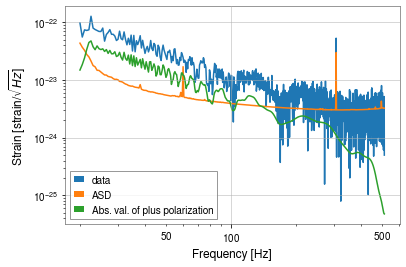

In [25]:
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["cross"][idxs]),
          label="Abs. val. of plus polarization")

#ax.set_xlim(minimum_frequency,maximum_frequency)
#ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [8]:
# Create priors
prior = injection_parameters.copy()
prior['mass'] = bilby.core.prior.Uniform(45, 55, r'$M$', unit='$M_sun$')
#prior['mass'] = bilby.core.prior.Uniform(45, 55, r'$M$', unit='$M_sun$')
# Define likelihood
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(interferometers=ifos, waveform_generator=waveform_generator, priors=prior)

In [ ]:
# Launch sampler
result = bilby.core.sampler.run_sampler(likelihood, prior, sampler='dynesty', npoints=500, injection_parameters=injection_parameters, outdir=outdir, label=label, dlogz=3, npool=8)

10:26 bilby INFO    : Running for label 'moving_bbh', output will be saved to 'outdir'
10:26 bilby INFO    : Using lal version 7.1.2
10:26 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v6.82;Id: cf792129c2473f42ce6c6ee21d8234254cefd337;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
10:26 bilby INFO    : Using lalsimulation version 2.5.1
10:26 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v6.82;Id: cf792129c2473f42ce6c6ee21d8234254cefd337;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
10:26 bilby INFO    : Search parameters:
10:26 bilby INFO    :   mass = Uniform(minimum=45, maximum=55, name='$M$', latex_label='$M$', unit='$M_sun$', boundary=None)
10:26 bilby INFO    :   ratio = 6
10:26 bilby INFO    :   distance = 300
10:26 bilby INFO    :   theta = 45
10:26 bilby INFO    :   phi = 45
10:26 bilby INFO    :   speed = 3000
10:26 bilby INFO    :   v_the = 0
10:26 bilby INFO    :   v_p

0it [00:00, ?it/s]

10:27 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 8, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f6e1b2e72d0>>, 'dlogz': 3, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
10:27 bilby INFO    : Checkpoint every check_point_delta_t = 600s
10:27 bilby INFO    : Using dynesty version 1.0.1
10:27 bilby INFO    : Generating initial points from the prior

512it [11:17,  2.14s/it, bound:0 nc:  9 ncall:1.4e+03 eff:35.5% logz-ratio=-473.45+/-0.16 dlogz:4461.525>3] 

In [9]:
ifos[0].time_domain_strain

array([ 6.45101852e-23, -1.40381007e-24,  1.28633590e-23, ...,
       -1.57319829e-24,  3.34836117e-23,  2.30520039e-23])

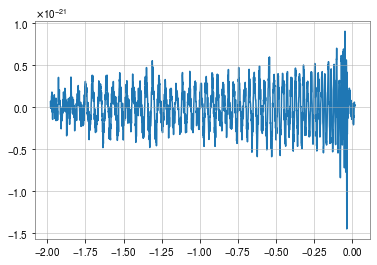

In [12]:
plt.plot(H1.strain_data.time_array,H1.strain_data.time_domain_strain)

In [11]:
H1.strain_data.time_domain_strain

array([ 6.45101852e-23, -1.40381007e-24,  1.28633590e-23, ...,
       -1.57319829e-24,  3.34836117e-23,  2.30520039e-23])

In [7]:
import h5py
import numpy as np
  
# initializing a random numpy array
arr1 = np.random.randn(10000)
arr2 = np.random.randn(10000)
  
# creating a file
with h5py.File('test_read.hdf5', 'w') as f:
    f.create_dataset('array_1', data = arr1)
    f.create_dataset('array_2', data = arr2)

In [18]:
# open the file as 'f'

with h5py.File('test_read.hdf5', 'r') as f:
    d1 = list(f['array_1'])
    d2 = list(f['array_2'])

In [26]:
with h5py.File('com_time_series.hdf5', 'w') as f:
    f.create_dataset('t', data = H1.strain_data.time_array)
    f.create_dataset('h(t)', data = H1.strain_data.time_domain_strain)

In [28]:
with h5py.File('com_time_series.hdf5', 'r') as f:
    t = list(f['t'])
    h = list(f['h(t)'])

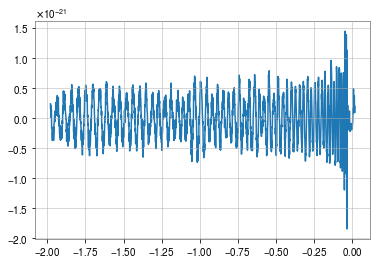

In [29]:
plt.plot(t,h)

In [31]:
L1 = ifos[1]

with h5py.File('com_time_series_L1.hdf5', 'w') as f:
    f.create_dataset('t', data = L1.strain_data.time_array)
    f.create_dataset('h(t)', data = L1.strain_data.time_domain_strain)